In [2]:
# Metodo Herón
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [25]:
def Heron(N, n_0=1, e=.1e-50):
    """
    Heron
    funcion que obtiene la raiz cuadrada por el metodo de Herón de Alejandría 

    Params
    __________________
    
    N: Numero positivo del que sacaremos la raíz cuadrada
    n_0: Valor inicial de la posible raiz
    e: Error máximo aceptado
    ___________________
    Devuelve
    n: Raíz cuadrada aprox si n>0 n; None en otro caso
    """
    if N <= 0: return None
    err, i = 1, 0
    while err>e:
        print(i, "=>", n_0, "error", err)
        i += 1
        plt.scatter(i,n_0,c="green",s=10)
        plt.scatter(i,err,c="red",s=10)
        n = 0.5*(N/n_0+n_0)
        err = abs(n-n_0)/n_0
        n_0 = n
    plt.xlabel("iteracion")
    plt.ylabel("Raiz(Verde)/ Error(rojo)")

0 => 5 error 1
1 => 5.2 error 0.040000000000000036
2 => 5.196153846153846 error 0.0007396449704141986
3 => 5.196152422706827 error 2.7394243147282857e-07
4 => 5.196152422706632 error 3.760460364483272e-14


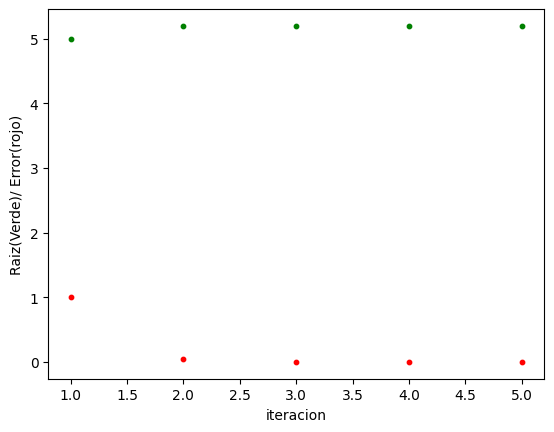

In [26]:
Heron(27,5)

In [16]:
#Biseccion
import numpy as np
def biseccion(f,bias=0, a0=0, b0=0, emax=1e-5,iter_max=50, graf=True):
    a,b = a0,b0
    err,i = 1,0
    C, Fc = [], []
    while err>emax and i<iter_max:
        c = (a+b)/2
        fa = f(a,bias)
        fc = f(c,bias)
        C.append(c)
        Fc.append(fc)
        if fa*fc < 0:
            b = c
        else:
            a = c
        err = abs(fc)
        i +=  1
    if graf: grafica(f, bias , C, Fc)
    return(i,c)

In [17]:
def grafica (f, bias=0,C= None,Fc=None):
    #Intervalo
    cc = C.copy()
    cc.sort()
    x = np.linspace(cc[0],cc[-1],100)
    plt.plot(x,f(x,bias),color="green")
    plt.scatter(C,Fc,c="red",s=10)
    plt.scatter(C[-1], Fc[-1], c="blue", s=50)
    plt.show()

In [18]:
def x_cuad(x, bias):
    return x**2-bias

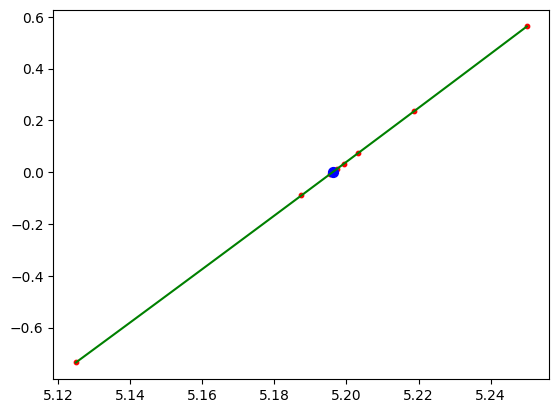

(15, 5.1961517333984375)

In [19]:
iter_, raiz_ = biseccion(x_cuad,bias=27,a0=5,b0=5.5)
iter_, raiz_

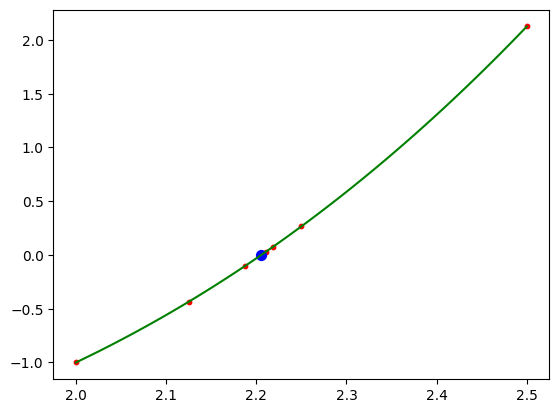

(19, 2.2055702209472656)

In [30]:
def f1(x, bias=0):
    return x**3 - 2*x**2 - bias
iter_, raiz_= biseccion(f1,bias=1,a0=1,b0=3)
iter_, raiz_

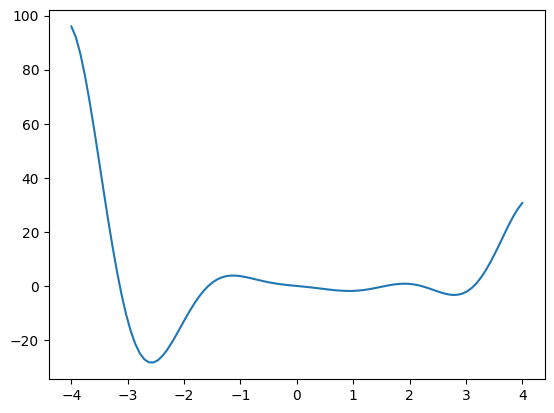

In [31]:
def f2(x, bias=0):
    return np.sin(2*x) * (x**3 - 2*x**2-bias)
x= np.linspace(-4,4,100)
plt.plot(x,f2(x,1))
plt.show()

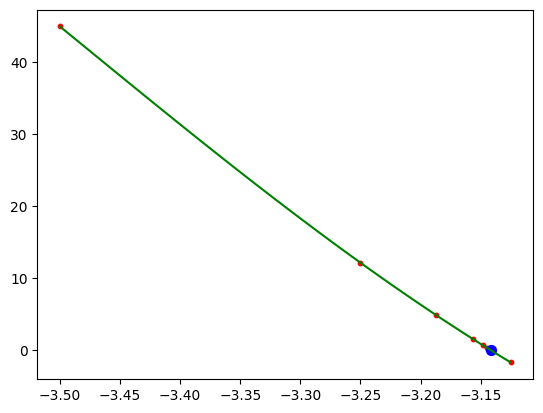

(22, -3.1415927410125732)

In [32]:
iter_, raiz_= biseccion(f2,1,-4,-3)
iter_, raiz_

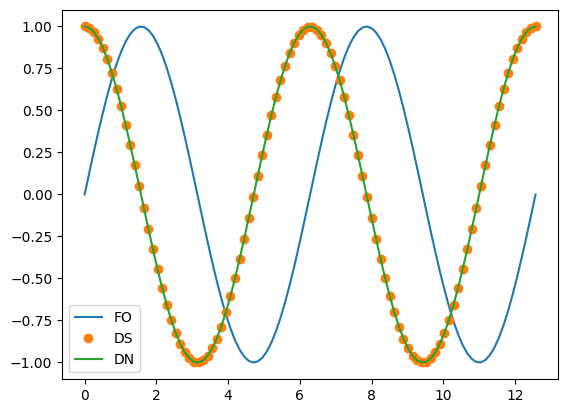

In [34]:
x = np.linspace(0, 4*np.pi,100)
f = lambda x,bias=0: np.sin(x-bias) # funcion original
fdy = np.cos(x) #derivada simbolica
plt.plot(x,f(x), label = "FO")
plt.plot(x,fdy, "o", label="DS")
plt.plot(x,Df(f,x), label = "DN")
plt.legend()
plt.show()

In [33]:
#Newtown - Raphson
def Df(f, x, bias=0, h=1e-5):
    return ( f(x+h,bias) - f(x,bias) )/h

In [42]:
def newton_raphson(f, x0, bias=0, emax=1e-5, iter_max=50, graf=True):
    error,i = 1,0
    C, Fc = [], []
    
    while error>emax and i<iter_max:
        xi = x0 - f(x0,bias) / Df(f, x0, bias)
        C.append(x0)
        Fc.append(f(x0,bias))
        error = abs( f(xi,bias)-f(x0,bias) )
        x0 = xi
        i += 1
    if graf: grafica (f, bias, C , Fc)
    return i, x0
        

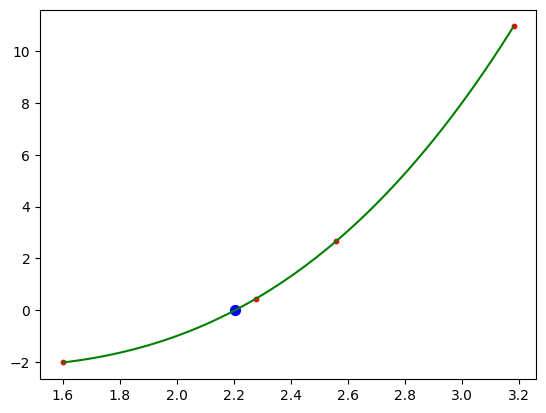

(7, 2.2055694304005917)

In [47]:
iter_, raiz_ = newton_raphson(f1, 1.6,1)
iter_, raiz_

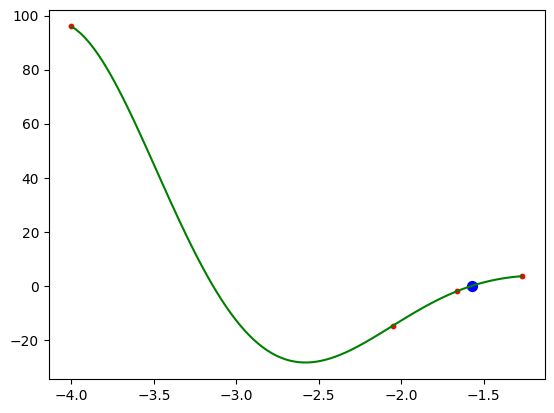

(7, np.float64(-1.570796326794713))

In [49]:
iter_, raiz_ = newton_raphson(f2, -4 ,1)
iter_, raiz_

In [1]:
# Clasificador de Euclides(Determinista)
import numpy as np
#SYMPY => Simbolic python
from sympy import Matrix, symbols, simplify
def clasif_e(samples):
    #Matriz de variables predictorias
    X = Matrix( [ symbols( "x"+str(i) ) for i in range(samples[0].shape[0])  ] )
    print(X)
    fds=[]
    for s in samples:
        m = Matrix(np.mean(s,axis=1))
        fds.append(simplify(X.T*m-(m.T*m)/2))
    return fds

In [3]:
w1=np.array([[1,2],[2,2],[3,1],[2,3],[3,2]]).T
w2=np.array([[8,10],[9,8],[9,9],[8,9],[7,9]]).T
samples=(w1,w2)
clasif_e(samples)

Matrix([[x0], [x1]])


[Matrix([[2.2*x0 + 2.0*x1 - 4.42]]), Matrix([[8.2*x0 + 9.0*x1 - 74.12]])]

In [4]:
w1=np.array([[1,5,6,1],[2,3,4,-2],[0,1,5,3],[1,3,5,2]]).T
w2=np.array([[6,8,-1,6],[7,9,3,6],[8,7,1,9]]).T
samples=(w1,w2)
fds = clasif_e(samples)
for fd in fds:
    print(fd)

Matrix([[x0], [x1], [x2], [x3]])
Matrix([[1.0*x0 + 3.0*x1 + 5.0*x2 + 1.0*x3 - 18.0]])
Matrix([[7.0*x0 + 8.0*x1 + 1.0*x2 + 7.0*x3 - 81.5]])


In [5]:
o1 = {"x0":3,"x1":1,"x2":3, "x3":1}
for fd in range(len(fds)):
    print("fd"+str(fd+1) +"=", fds[fd].evalf(subs=o1) )

fd1= Matrix([[4.00000000000000]])
fd2= Matrix([[-42.5000000000000]])


In [17]:
o2 = {"x0":5,"x1":10,"x2":33, "x3":9}
for fd in range(len(fds)):
    print("fd"+str(fd+1) +"=", fds[fd].evalf(subs=o2) )

fd1= Matrix([[191.000000000000]])
fd2= Matrix([[129.500000000000]])


In [26]:
import numpy as np
#SYMPY => Simbolic python
from sympy import Matrix, symbols, simplify, log
def clasif_m(samples):
    #Matriz de variables predictorias
    X = Matrix( [ symbols( "x"+str(i) ) for i in range(samples[0].shape[0])  ] )
    #print(x)
    fds=[]
    for s in  samples:
        m = Matrix(np.mean(s,axis=1))
        mcov = np.cov(s,bias=True)
        mci = Matrix(mcov).inv()
        print("media: \n",m,"cov: \n", mcov, "Matriz Cov Invertido: \n", mci)
        fds.append( simplify( -.5*(X.T*mci*X) + X.T*mci*m -.5*(m.T*mci*m) -Matrix([.5*(log (mci.det()))]) ) )
    return fds

In [27]:
w1=np.array([[1,2],[2,2],[3,1],[2,3],[3,2]]).T
w2=np.array([[8,10],[9,8],[9,9],[8,9],[7,9]]).T
samples=(w1,w2)
clasif_m(samples)

media: 
 Matrix([[2.20000000000000], [2.00000000000000]]) cov: 
 [[ 0.56 -0.2 ]
 [-0.2   0.4 ]] Matriz Cov Invertido: 
 Matrix([[2.17391304347826, 1.08695652173913], [1.08695652173913, 3.04347826086957]])
media: 
 Matrix([[8.20000000000000], [9.00000000000000]]) cov: 
 [[ 0.56 -0.2 ]
 [-0.2   0.4 ]] Matriz Cov Invertido: 
 Matrix([[2.17391304347826, 1.08695652173913], [1.08695652173913, 3.04347826086957]])


[Matrix([[-1.08695652173913*x0**2 - 1.08695652173913*x0*x1 + 6.95652173913044*x0 - 1.52173913043478*x1**2 + 8.47826086956522*x1 - 16.9768445432953]]),
 Matrix([[-1.08695652173913*x0**2 - 1.08695652173913*x0*x1 + 27.6086956521739*x0 - 1.52173913043478*x1**2 + 36.304347826087*x1 - 277.411627151991]])]

In [29]:
#Tarea doc Tema 3
w1 = np.array([[0.5, 1, 3, 3, 3, 3, 5, 5, 5, 5],[10.5, 12.5, 10.5, 12.5, 14.5, 18, 18, 16, 14.5, 13]])
w2 = np.array([[6, 8, 9, 8.5, 7, 8],[9, 10, 11, 12, 13.5, 16]])
samples=(w1,w2)
clasif_m(samples)


media: 
 Matrix([[3.35000000000000], [14.0000000000000]]) cov: 
 [[2.5025 2.275 ]
 [2.275  6.65  ]] Matriz Cov Invertido: 
 Matrix([[0.579975579975580, -0.198412698412698], [-0.198412698412698, 0.218253968253968]])
media: 
 Matrix([[7.75000000000000], [11.9166666666667]]) cov: 
 [[0.97916667 0.5625    ]
 [0.5625     5.36805556]] Matriz Cov Invertido: 
 Matrix([[1.08669165885661, -0.113870665417057], [-0.113870665417057, 0.198219306466729]])


[Matrix([[-0.28998778998779*x0**2 + 0.198412698412698*x0*x1 - 0.834859584859585*x0 - 0.109126984126984*x1**2 + 2.39087301587302*x1 - 14.1180282392282]]),
 Matrix([[-0.543345829428304*x0**2 + 0.113870665417057*x0*x1 + 7.06490159325211*x0 - 0.0991096532333646*x1**2 + 1.47961574507966*x1 - 35.3938735664761]])]

In [ ]:
import  numpy as np

In [1]:
class Perceptron():
    """
    Params
    ______
    eta: Float => taza de aprendizaje (0 < eta < 1)
    n_iter: int => Número de iteraciones sobre el conjunto de entrenamiento
    random_state: int => semilla del inicializador de números (pseudo)aleatorios
    __________
    Atributos
    __________
    w_: 1d_array => pesos al final de aprendizaje
    errors_: list => 

    """

    def __init__(self, eta = .01, n_iter = 50, random_state = 42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self ,X ,y ):
        """ Realiza el ajuste (entrenamiento)
        X: {np.array}, shape = [n_samples, m_features]
        vectores de entrenamiento
        y: {np.array}, shape = [n_samples]
        """
        rgen = np.random.RandomState(self.random_state)
        if self.random_state is None:
            self.w_ = np.zeros( 1 + len(X[1]) )
        else:
            self.w_ = rgen.normal( loc = 0.0, scale = 0.01, size = 1 + X.shape[1] )
            
        self.errors_ = []
        
        for _ in range(self.n_iter): # Guión bajo en for para solo iterar y no guardar la variable
            errors = 0
            for xi, yi in zip(X, y):
                update= self.eta*(yi-self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """" Calcula la Entrada de la Célula """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self ,X):
        """ Obtiene las etiquetas de clase con el escalon unitario """
        return np.where(self.net_input(X) >= 0.0 , 1, -1)
    


In [37]:
import numpy as np
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = ([1,1,1,-1])
ppn = Perceptron(n_iter = 6, eta = 0.1)
ppn.fit(X, y)
print("Pesos : %s" % ppn.w_)

Pesos : [ 0.40496714 -0.40138264 -0.19352311]


In [38]:
import numpy as np
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = ([1,1,1,-1])
ppn = Perceptron(n_iter = 6, eta = 0.1, random_state = None)
ppn.fit(X, y)
print("Pesos : %s" % ppn.w_)

Pesos : [ 0.4 -0.4 -0.2]


In [39]:
import numpy as np
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = ([1,1,1,-1])
ppn = Perceptron(n_iter = 6, eta = 0.1, random_state = 42)
ppn.fit(X, y)
print("Pesos : %s" % ppn.w_)

Pesos : [ 0.40496714 -0.40138264 -0.19352311]


In [31]:
ppn.predict(np.array([-1,1]))

array(1)

In [34]:
ppn.predict(np.array([1,-1]))

array(1)